###**Data Science and Business Analytics(GRIP June 2021)**
####**Task 6 : Prediction using Decision Tree Algorithm**
####**Author : Anjalina Tirkey**
**Prediction Statement :** **The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.**

**In this task we create the Decision Tree classifier and visualize it graphically.**


**Importing Required Libraries**

In [36]:
import pandas as pd                  #used for data wrangling and data manipulation
import numpy as np                   #used for numerical and scientific computing
import matplotlib.pyplot as plt      #used for data visualization and graphical plotting
import seaborn as sns                #used for data visualization , it is built on matplotlib
%matplotlib inline

**Loading the Dataset**

In [37]:
iris = pd.read_csv('/content/Iris.csv')

**Exploratory Data Analysis**

In [38]:
iris.head()                           #showing first five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [39]:
iris.tail()                            #showing last five rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [40]:
iris.describe()                        #statistical representaion of data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [41]:
iris.shape         #checking for numbers of rows and columns

(150, 6)

In [42]:
iris.info()     #gives the summarize data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [43]:
iris.isnull().any()       #checking for any null value

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [44]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**Data Visualization**

In [45]:
group_names = iris['Species'].unique().tolist()
group_names

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

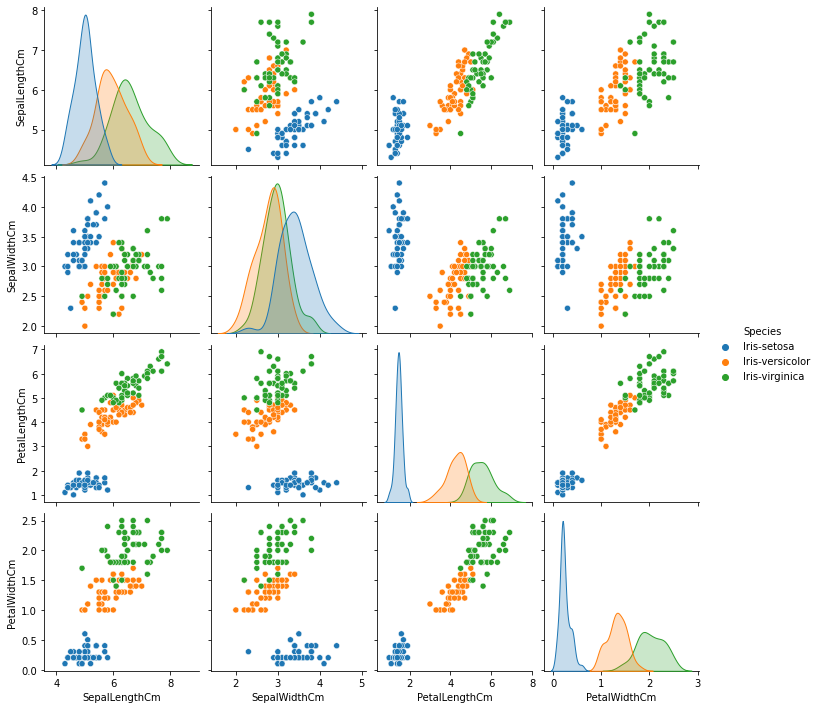

In [ ]:
sns.pairplot(iris.drop("Id", axis=1), hue="Species")
plt.show()

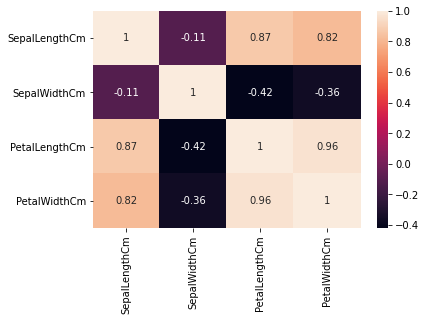

In [46]:
no_id = iris.copy()
no_id.drop("Id", axis = 1, inplace = True)
sns.heatmap(data = no_id.corr(), annot = True)  #shows the correlation relationship between variables
plt.show() 

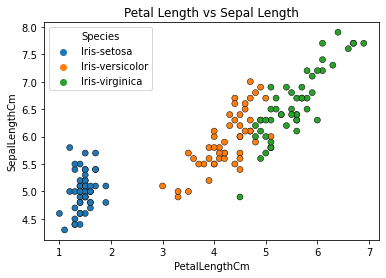

In [47]:
#PetalLength vs SepalLength
sns.scatterplot(x = 'PetalLengthCm', y = 'SepalLengthCm',edgecolor='k', data = iris ,hue ='Species')
plt.title('Petal Length vs Sepal Length')
plt.show()

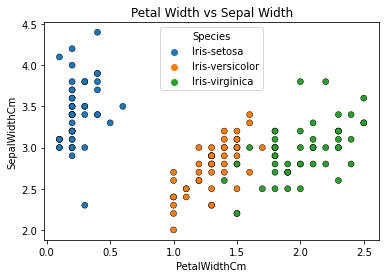

In [48]:
#PetalWidth vs SepalWidth
sns.scatterplot(x = 'PetalWidthCm', y = 'SepalWidthCm',edgecolor='k', data = iris ,hue ='Species')
plt.title('Petal Width vs Sepal Width')
plt.show()

**Importing Machine Learning Scikit_learn built-in Libraries**

###***Decission Tree Regressor***

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [50]:
x = iris[['PetalLengthCm']]                         #independent var
y = iris[['SepalLengthCm']]                         #dependent var

In [51]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25)

In [52]:
dtr = DecisionTreeRegressor()

In [53]:
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [54]:
ypred = dtr.predict(xtest)

In [55]:
df = pd.DataFrame(ytest)
df.reset_index(inplace = True, drop = True)
df.head()

,SepalLengthCm
0,6.3
1,6.7
2,5.0
3,6.3
4,4.9


In [56]:
ypred[0:5]

array([6.13333333, 6.55      , 4.94      , 6.55      , 5.07272727])

In [57]:
from sklearn.metrics import mean_squared_error

In [58]:
mean_squared_error(ytest,ypred)

0.14556182458556857

**Visualizing the Decision Tree in Regression Task**

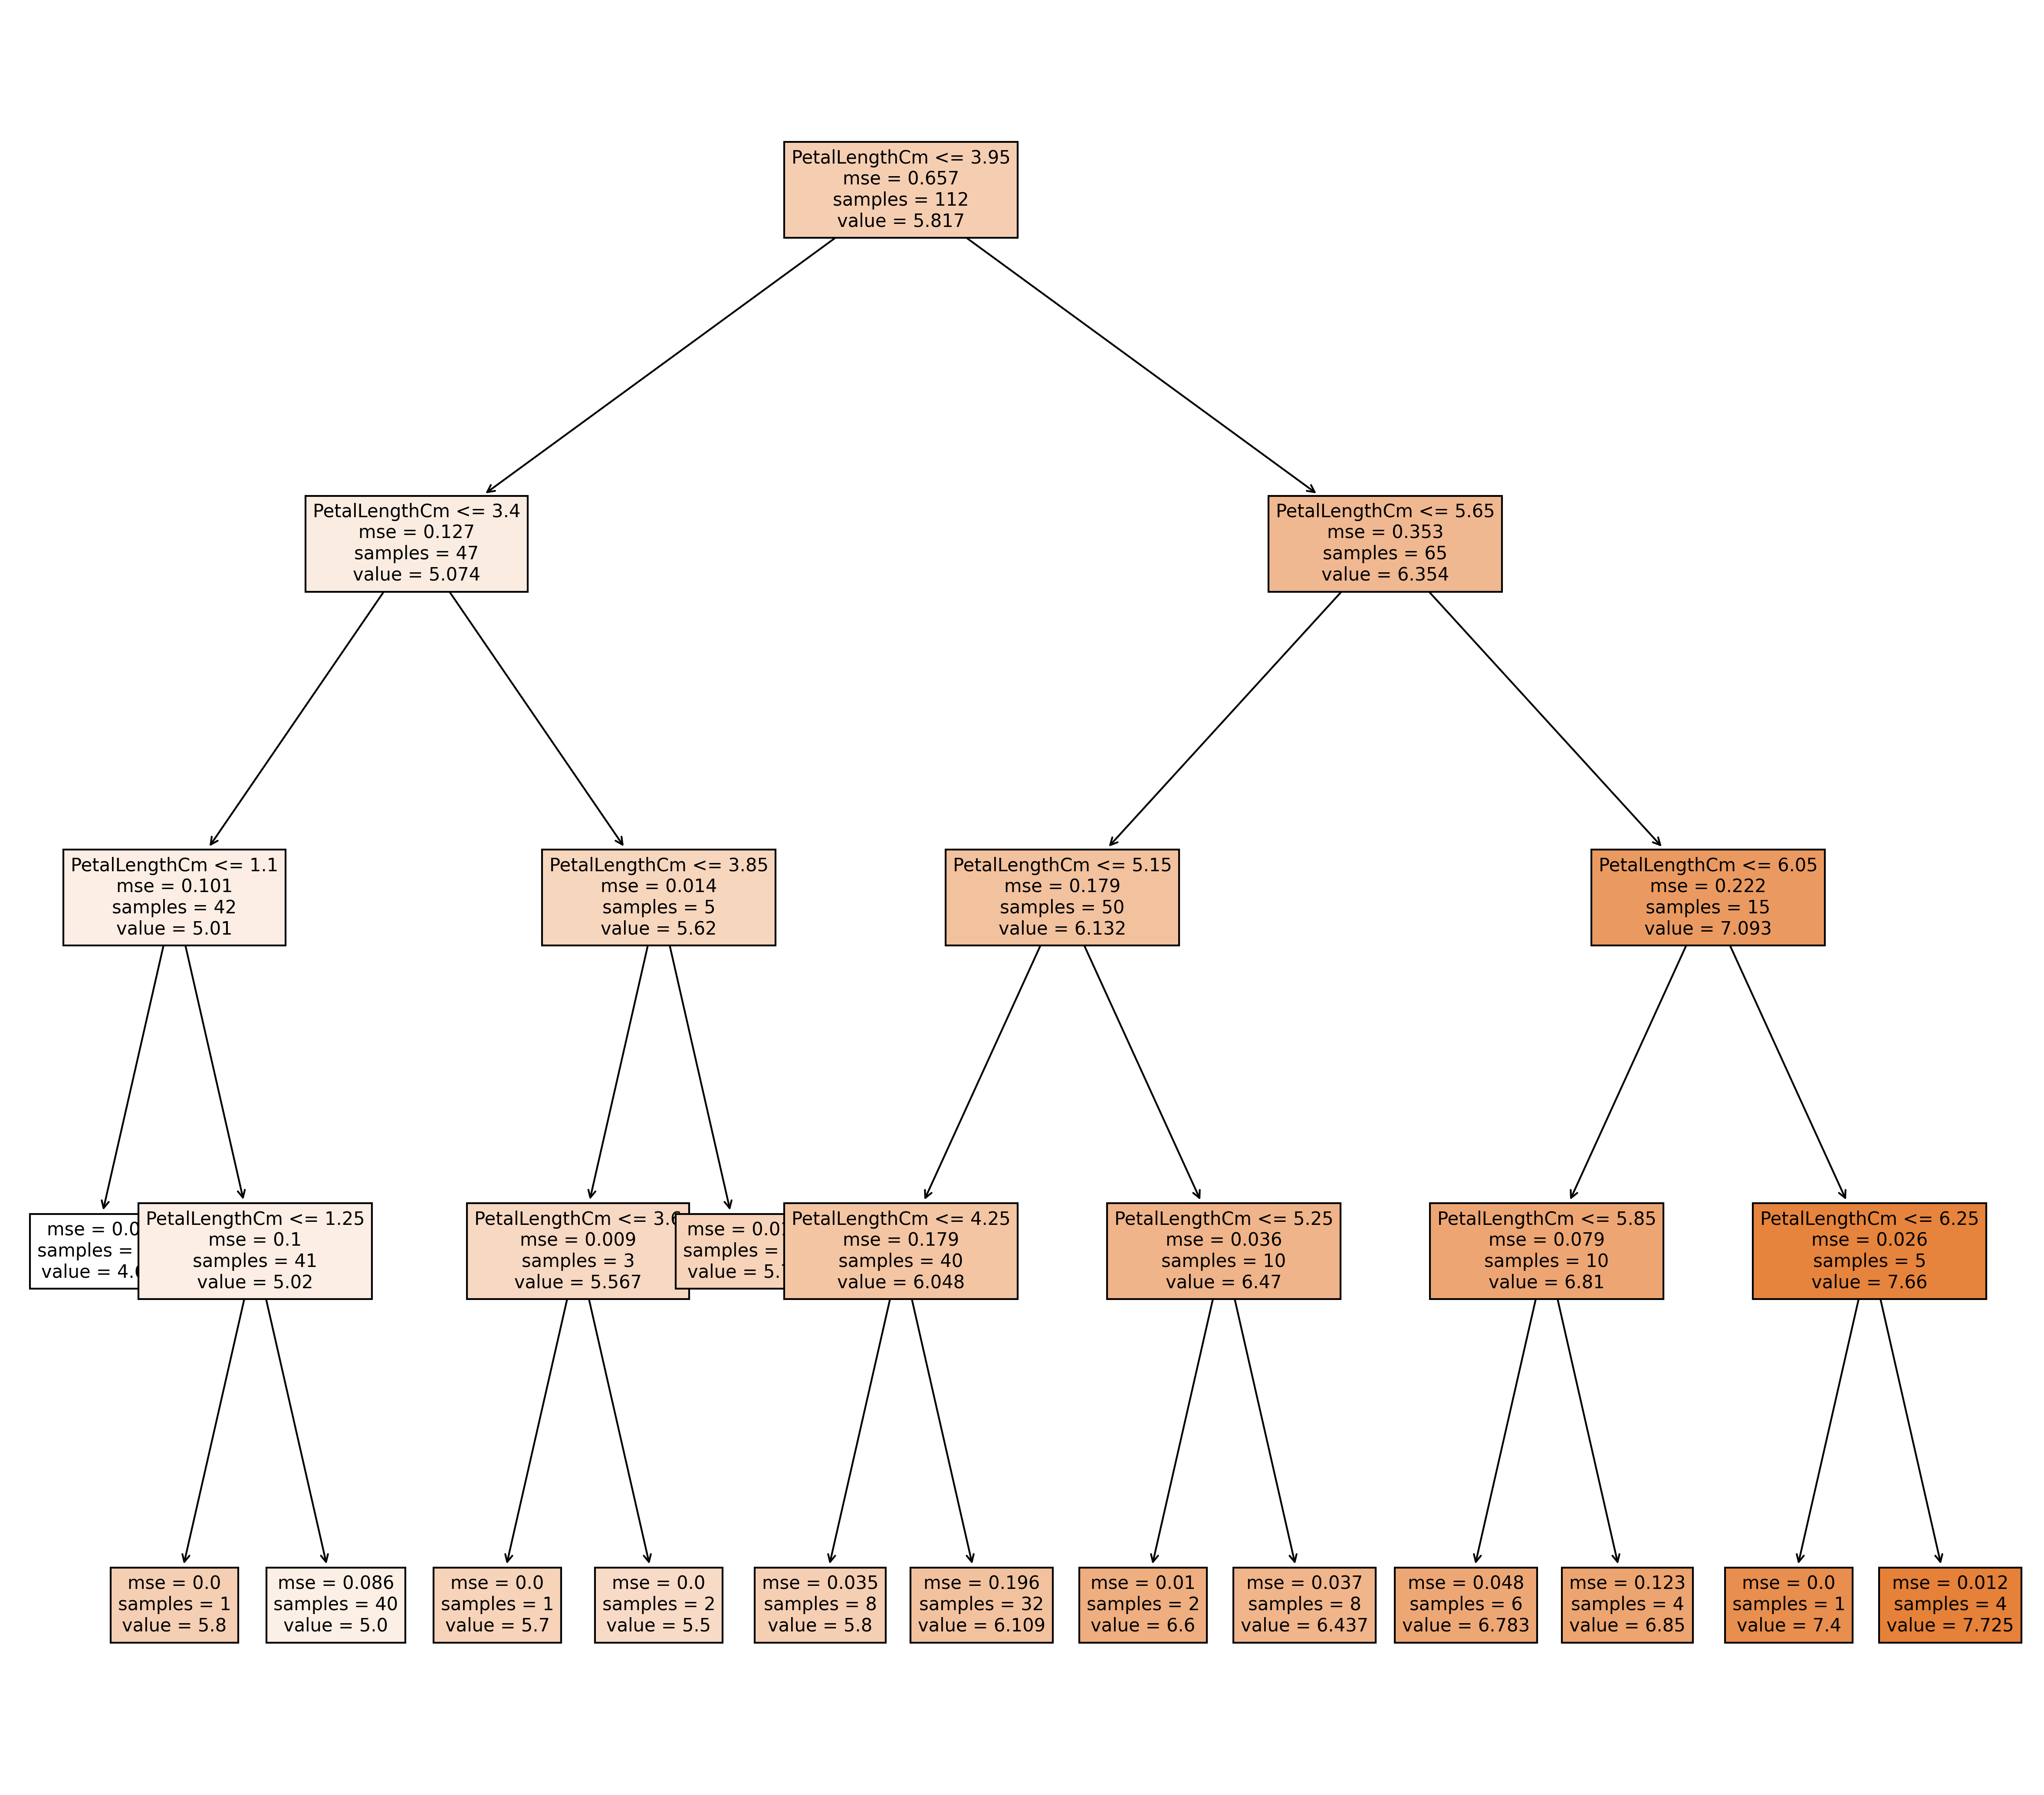

In [59]:
from sklearn import tree
#Train the model using DecisionTree Regression
feature_names = ['PetalLengthCm']
class_names = ['SepalLengthCm']
reg_tree = DecisionTreeRegressor(max_depth=4, random_state=1)
reg_tree.fit(xtrain, ytrain)

# Plot the decision tree
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=300,figsize=(20,18))
tree.plot_tree(reg_tree, fontsize=10,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()

###***Decision Tree Classfier***

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [61]:
x = iris.iloc[:,1:5]
y = iris.iloc[:,-1]            

In [62]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [63]:
dtc = DecisionTreeClassifier()

In [64]:
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
ypred = dtc.predict(xtest)
ypred

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-virginica'], dtype=object)

In [66]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest,ypred)
accuracy*100

96.66666666666667

In [67]:
data = {'y_Actual': ytest,'y_Predicted': ypred}
df = pd.DataFrame(data)
df.reset_index(inplace = True, drop = True)
df.head()

,y_Actual,y_Predicted
0,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor
4,Iris-versicolor,Iris-versicolor


**Visualizing the Decision Tree in Classification Task**

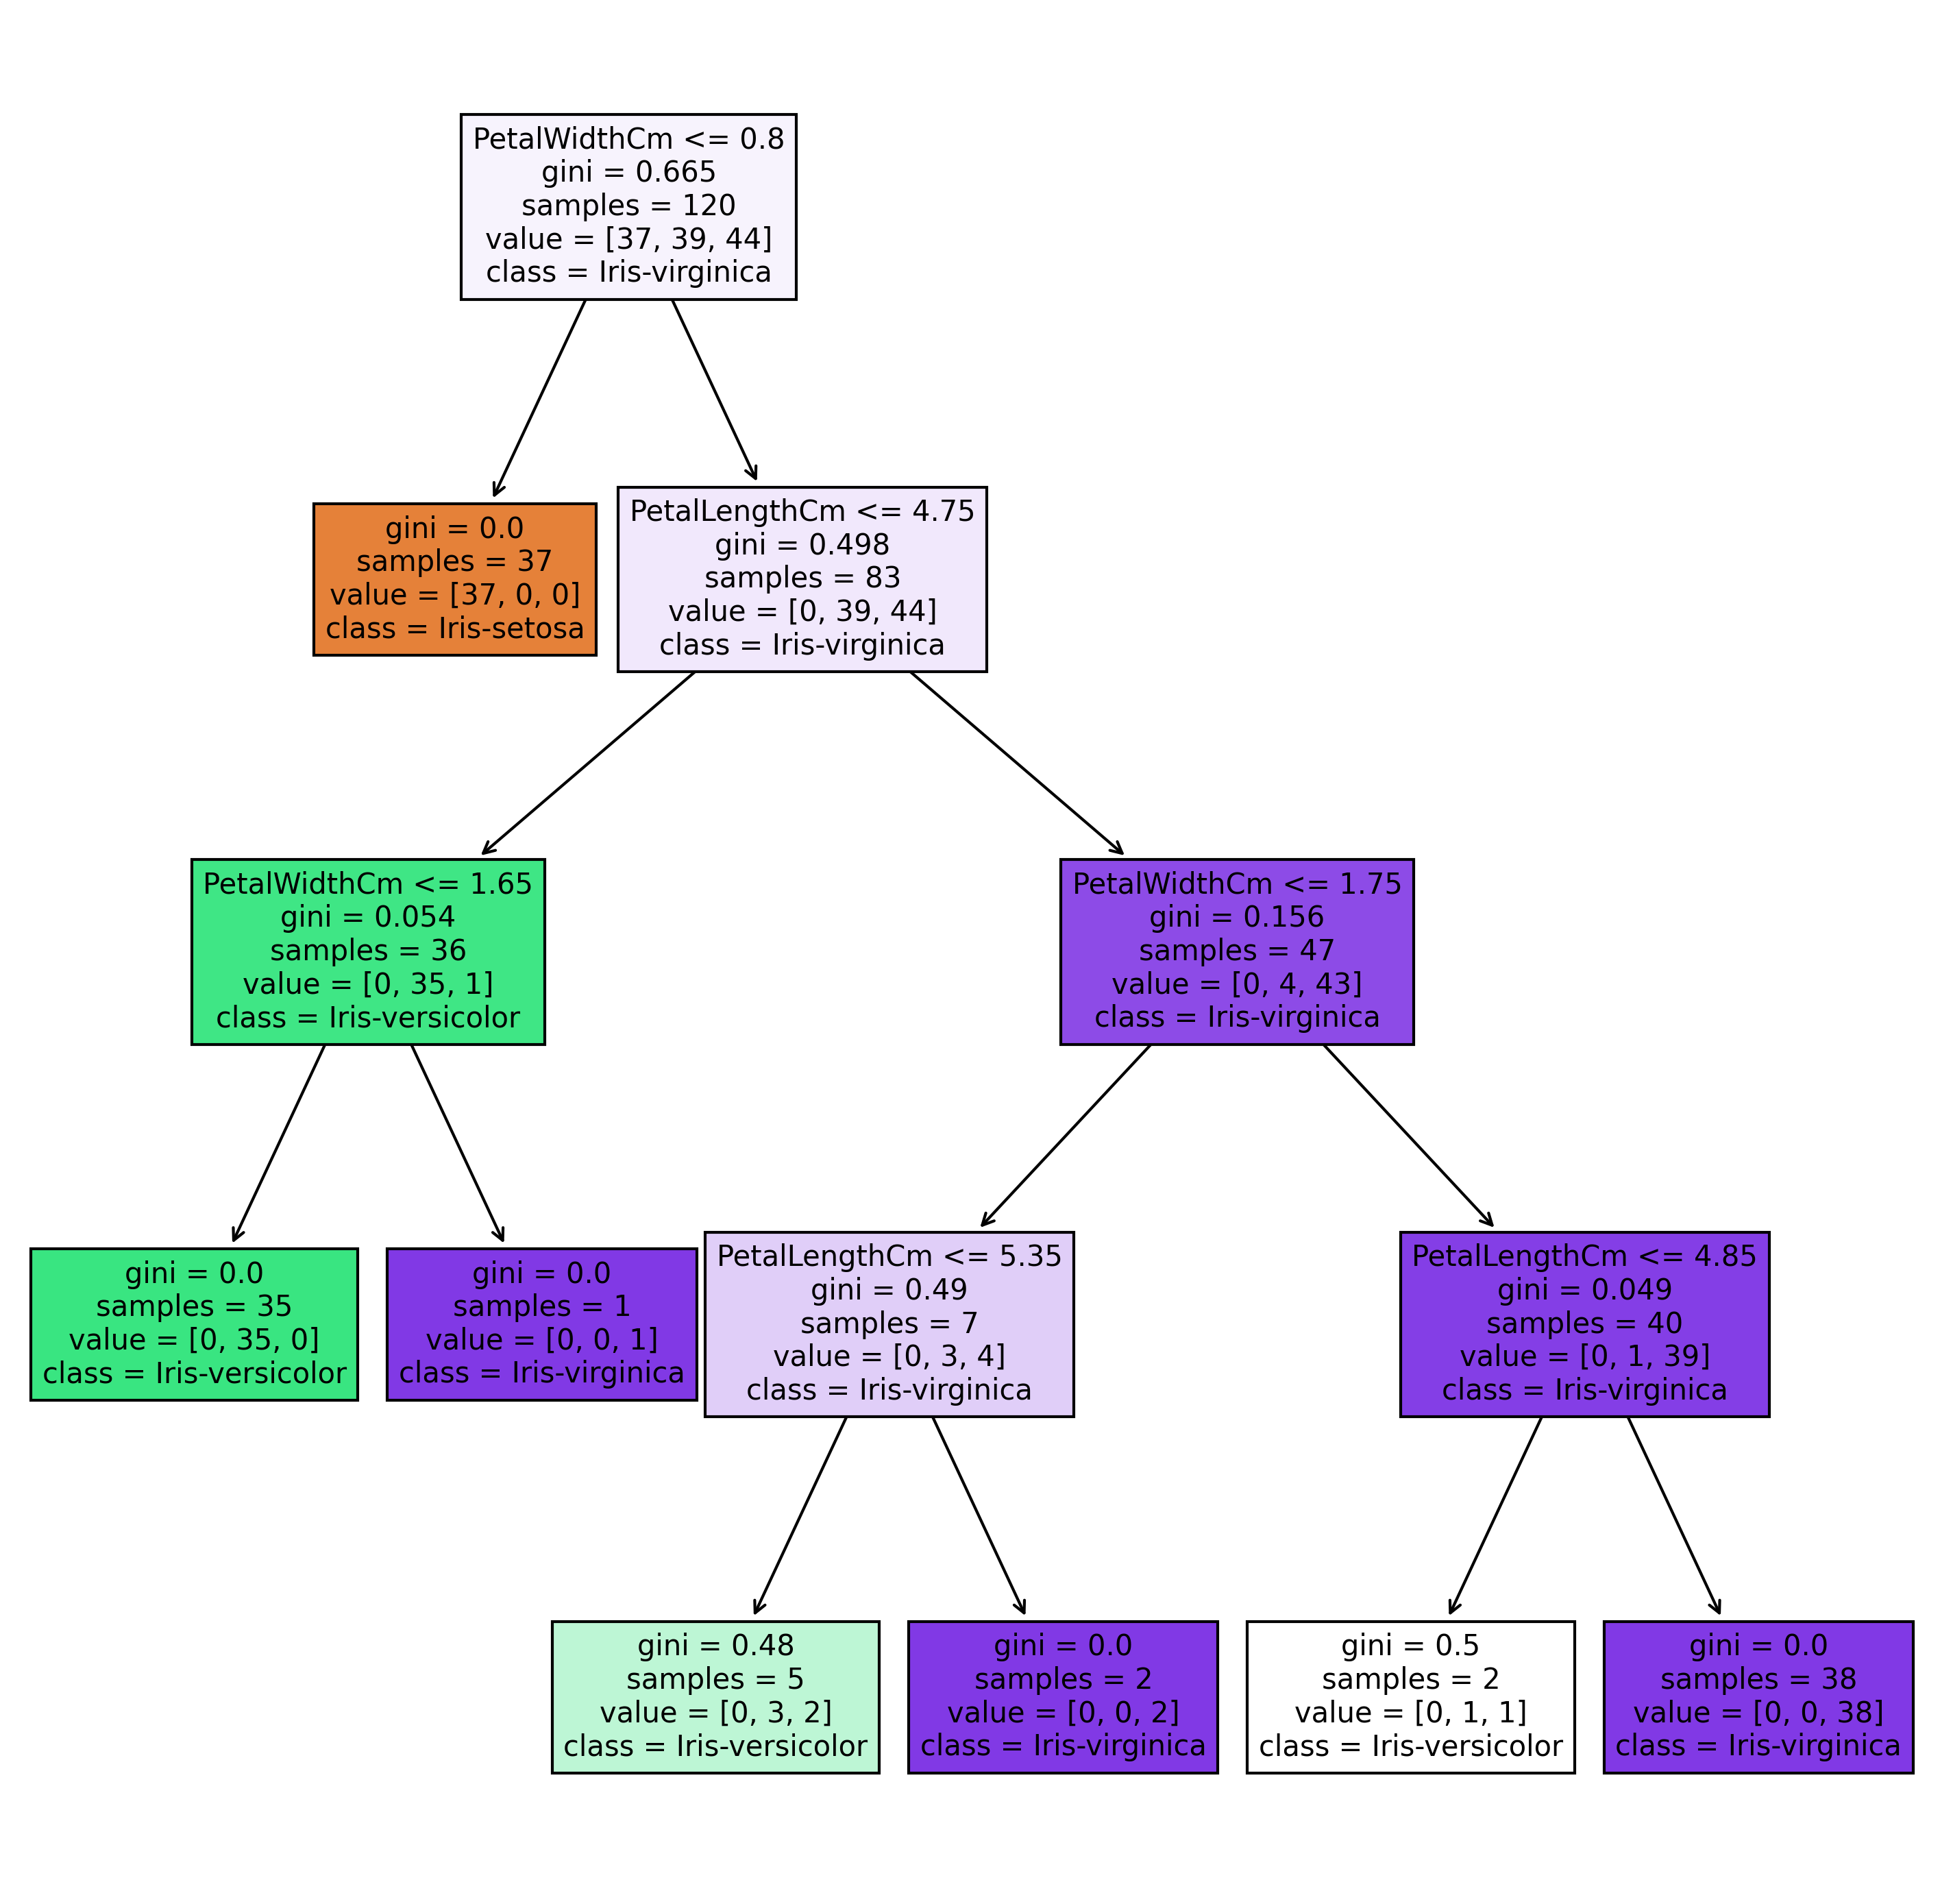

In [68]:
from sklearn import tree
#Train the model using DecisionTree classifier
feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
class_names = ['Iris-setosa','Iris-versicolor','Iris-virginica']
clf_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)
clf_tree.fit(xtrain, ytrain)

# Plot the decision tree
fig, ax = plt.subplots(nrows=1,ncols=1,dpi=300,figsize=(12,12))
tree.plot_tree(clf_tree, fontsize=10,feature_names=feature_names,class_names=class_names,filled=True)
plt.show()

**Hence, the Decision Tree Model has been created and visualized with the accuracy of 96.67% in the Test dataset. It also predict the class of the new data successfully.**